## Project 2

### Jumpei Fujimoto

** DSCI 11000 - Introduction to Data Science**

** Due Friday, Nov. 9**

In this project, you will create functions to implement a linear regression algorithm. We will discuss linear regression in class. You will apply these functions to generate predictions for two different datasets. Detailed instructions for this project can be found here: [Project 02 Instructions](https://lindenwood.instructure.com/courses/37728/files/folder/Projects/Project%2002?preview=13065514).

We will begin by importing some packages. In the next cell, import the NumPy package under the alias `np` and import matplotlib.pyplot under the alias `plt`. 

**Note: We will only be using NumPy to generate some random data. You could code all of your functions to work with standard Python lists, not NumPy arrays.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: The `predict()` Function

Use the cell below to define the `predict()` function. 

In [2]:
def predict(b, x0):
    total = b[0] +b [1] * x0
    return total

** Test code for Part A**

In [3]:
print(predict([5,2], 7))

19


## Part B: The `find_sse()` Function

Use the cell below to define the `find_sse()` function.

In [4]:
def find_sse(x, y, b):    
    temp = 0
    for i in range(0, len(x)):
        y_hat = predict(b, x[i])
        e = y[i] - y_hat
        temp = e**2 + temp
    return temp

** Test code for Part B**

In [5]:
x_test = [1, 2, 3, 4]
y_test = [5, 8, 7, 10]
b_test = [1, 2]

print(find_sse(x_test, y_test, b_test))

14


## Part C: The `regression()` Function

Use the cell below to define the `regression()` function. 

In [6]:
def regression(x, y):
    b = [0,0]
    sse = find_sse(x, y, b)
    count = 0
    done = False
    
    while not done:
        old_sse = sse
        new_b1 = [b[0] + 0.001, b[1]]
        new_b2 = [b[0] - 0.001, b[1]]
        new_b3 = [b[0], b[1] + 0.001]
        new_b4 = [b[0], b[1] - 0.001]
        
        new_sse1 = find_sse(x, y, new_b1)
        new_sse2 = find_sse(x, y, new_b2)
        new_sse3 = find_sse(x, y, new_b3)
        new_sse4 = find_sse(x, y, new_b4)
        
        new_sse = [new_sse1, new_sse2, new_sse3, new_sse4]
        new_b = [new_b1, new_b2, new_b3, new_b4]
        
        for i in range(0, len(new_sse)):
            if new_sse[i] < old_sse:
                old_sse = new_sse[i]
                b = new_b[i]
        count += 1
        
        if sse != old_sse:
            sse = old_sse
            
        else:
            break
            
        
    return (b, sse, count)  

** Test code for Part C**

In [7]:
x_test = [1, 2, 3, 4]
y_test = [5, 8, 7, 10]

coef, sse, iterations = regression(x_test, y_test)

print(coef)
print(sse)
print(iterations)

[3.994999999999671, 1.4019999999999566]
3.2000199999999994
7794


## Part D: Working with Simulated Data

The cell below creates two randomly generated lists: `x_data` and `y_data`. The cell also creates a scatter plot of the data. Run this cell as it.  

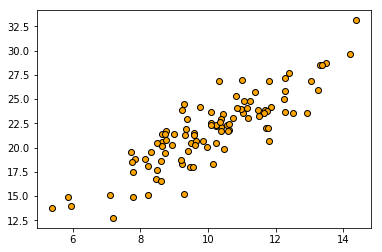

In [8]:
np.random.seed(1)
x_data = np.random.normal(10, 2, 100)
y_data = 4.3 + 1.7 * x_data + np.random.normal(0, 2, 100)
plt.scatter(x_data, y_data, c='orange', edgecolor='black')
plt.show()

In the cell below, run the `regression()` function, passing it the lists `x_data` and `y_data` as arguments. Store the results. 

In [9]:
coef, sse, iterations = regression(x_data, y_data)

Print a summary of the regression model. Match the output described in the instructions. 

In [10]:
print("Intercept of Model: " + str((round(coef[0],3))))
print("Slope of Model:     " + str(round(coef[1],3)))
print("Optimal SSE:        " + str(round(sse,3)))
print("Iteration:          " + str(round(iterations,3)))

Intercept of Model: 3.472
Slope of Model:     1.812
Optimal SSE:        344.678
Iteration:          5947


In [11]:
print("Intercept of Model: " + str(3.472))
print("Slope of Model:     " + str(1.812))
print("Optimal SSE:        " + str(344.678))
print("Iteration:          " + str(5947))

Intercept of Model: 3.472
Slope of Model:     1.812
Optimal SSE:        344.678
Iteration:          5947


A list of `x` values is provided below. Use a loop and the `predict()` function to print the following sentence for each value in the list, with the blanks filled in as appropriate:

    If x is equal to [__], the predicted value of y is [__]. 

In [12]:
new_x_values = [7.0, 8.2, 10.7, 11.3, 12.4]
for i in range(0, len(new_x_values)):
    y = predict(coef, new_x_values[i])
    
    print("If x is equal to " + str(new_x_values[i]) + " ," + "the predicted value of y is " + str(round(y, 3)) + ".")

If x is equal to 7.0 ,the predicted value of y is 16.156.
If x is equal to 8.2 ,the predicted value of y is 18.33.
If x is equal to 10.7 ,the predicted value of y is 22.86.
If x is equal to 11.3 ,the predicted value of y is 23.948.
If x is equal to 12.4 ,the predicted value of y is 25.941.


In the cell below, replace the blanks with the name of the list that stores the coeficients for your model. Then run the cell to display the regression line. 

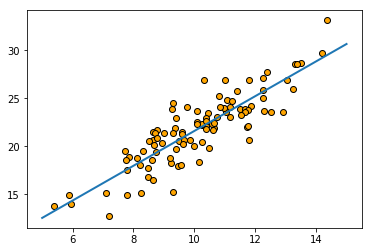

In [13]:
plt.scatter(x_data, y_data, c='orange', edgecolor='black')
plt.plot([5,15], [predict(coef,5), predict(coef,15)], linewidth=2)
plt.show()

## Part E: Predicing Car Prices

The cell below creates two lists, `price` and `mileage`, which contain information about 20 cars. All of the cars are the same model, and are from the same year. The `price` list contains the price of a used car, measured in thousands of dollars. The `mileage` list contains the number of miles on the car, measured in thousands of miles. This cell also creates a scatter plot of price as a function of mileage. 

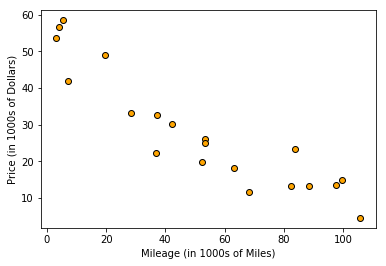

In [14]:
price = [53.7, 56.8, 58.5, 42.0, 48.9, 33.2, 22.2, 32.6, 30.3, 19.8, 
         26.1, 24.9, 18.1, 11.7, 13.3, 23.4, 13.2, 13.6, 14.8, 4.6]
mileage = [3.1,  4.1,  5.3,  7.1, 19.5, 28.3, 36.8, 37.2, 42.3,  52.3, 
           53.3, 53.4, 63.2, 68.4, 82.3, 83.9, 88.4, 97.6, 99.7, 105.9]

plt.scatter(mileage, price, c='orange', edgecolor='black')
plt.xlabel('Mileage (in 1000s of Miles)')
plt.ylabel('Price (in 1000s of Dollars)')
plt.show()

Use the `regression()` function to create a regression model that could be used to predict the price of a car given its mileage. 

In [15]:
coef, sse, iterations = regression(mileage, price)

Print a summary of the regression model. Match the output described in the instructions. 

In [16]:
print("Intercept of Model: " + str((round(coef[0],3))))
print("Slope of Model:     " + str(round(coef[1],3)))
print("Optimal SSE:        " + str(round(sse,3)))
print("Iteration:          " + str(round(iterations,3)))

Intercept of Model: 50.482
Slope of Model:     -0.434
Optimal SSE:        808.592
Iteration:          51425


Predict the price of cars with the following mileages: 20500, 37100, and 62900. For each mileage, print the following statement: 

    The predicted price of a car with [__] miles is $[__].
    
You do not have to use a loop for this if you would prefer not to.

In [17]:
newmile = [20500, 37100, 62900]
print("The predicted price of a car with " + str(newmile[0]) + " miles miles is $" + str(round(predict(coef, 20.5)* 1000))+ ".")
print("The predicted price of a car with " + str(newmile[1]) + " miles miles is $" + str(round(predict(coef, 37.1)* 1000))+ ".")
print("The predicted price of a car with " + str(newmile[2]) + " miles miles is $" + str(round(predict(coef, 62.9)* 1000))+ ".")

The predicted price of a car with 20500 miles miles is $41585.
The predicted price of a car with 37100 miles miles is $34381.
The predicted price of a car with 62900 miles miles is $23183.


In the cell below, replace the blanks with the name of the list that stores the coeficients for your model. Then run the cell to display the regression line. 

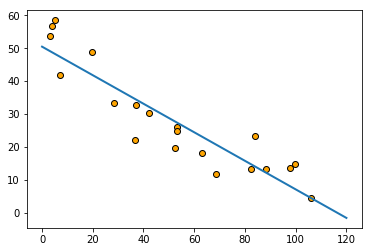

In [18]:
plt.scatter(mileage, price, c='orange', edgecolor='black')
plt.plot([0,120], [predict(coef,0), predict(coef,120)], linewidth=2)
plt.show()